In [ ]:
!pip install -q datascience                   # Package that is required by pandas profiling
!pip install -q pandas-profiling              # Library to generate basic statistics about data

     |████████████████████████████████| 69 kB 4.6 MB/s 


In [ ]:
!pip install -q --upgrade pandas-profiling

     |████████████████████████████████| 261 kB 14.7 MB/s 
     |████████████████████████████████| 10.1 MB 60.6 MB/s 
     |████████████████████████████████| 62 kB 695 kB/s 
     |████████████████████████████████| 102 kB 11.3 MB/s 
     |████████████████████████████████| 3.1 MB 63.6 MB/s 
     |████████████████████████████████| 596 kB 48.2 MB/s 
     |████████████████████████████████| 675 kB 33.7 MB/s 
     |████████████████████████████████| 812 kB 49.6 MB/s 
     |████████████████████████████████| 28.5 MB 50 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
import matplotlib.pyplot as plt
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

#-------------------------------------------------------------------------------------------------------------------------------
import phik                                                         # Importing phiK lib
from phik import resources, report
#-------------------------------------------------------------------------------------------------------------------------------
import math
import re

#-------------------------------------------------------------------------------------------------------------------------------
from numpy import * 
import string

#--------------------------------------------------------------------------------------------------------------------------------

In [ ]:
train = pd.read_csv('voice_train.csv',skipinitialspace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        2851 non-null   int64  
 1   meanfreq  2851 non-null   float64
 2   sd        2851 non-null   float64
 3   median    2851 non-null   float64
 4   Q25       2851 non-null   float64
 5   Q75       2851 non-null   float64
 6   IQR       2851 non-null   float64
 7   skew      2851 non-null   float64
 8   kurt      2851 non-null   float64
 9   sp.ent    2851 non-null   float64
 10  sfm       2851 non-null   float64
 11  mode      2851 non-null   float64
 12  centroid  2851 non-null   float64
 13  meanfun   2851 non-null   float64
 14  minfun    2851 non-null   float64
 15  maxfun    2851 non-null   float64
 16  meandom   2851 non-null   float64
 17  mindom    2851 non-null   float64
 18  maxdom    2851 non-null   float64
 19  dfrange   2851 non-null   float64
 20  modindx   2851 non-null   floa

In [ ]:
train.describe()

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,2851.00000,2851.00000,2851.00000,2851.00000,2851.00000,2851.00000,2851.00000,2851.00000,2851.00000,2851.00000,2851.00000,2851.00000,2851.00000,2851.00000,2851.00000,2851.00000,2851.00000,2851.00000,2851.00000,2851.00000,2851.00000
mean,1591.56542,0.18092,0.05714,0.18572,0.14035,0.22473,0.08438,3.11847,35.80833,0.89531,0.40847,0.16548,0.18092,0.14289,0.03683,0.25897,0.83361,0.05263,5.07575,5.02311,0.17393
std,909.93917,0.02980,0.01659,0.03617,0.04863,0.02351,0.04273,4.16373,131.43090,0.04480,0.17688,0.07692,0.02980,0.03219,0.01918,0.02981,0.52557,0.06298,3.52620,3.52519,0.11946
min,1.00000,0.03936,0.01836,0.01097,0.00023,0.04295,0.01456,0.14174,2.06846,0.73865,0.03688,0.00000,0.03936,0.05557,0.00978,0.10870,0.00781,0.00488,0.00781,0.00000,0.00000
25%,808.50000,0.16374,0.04208,0.16973,0.11114,0.20876,0.04266,1.63841,5.60450,0.86219,0.25919,0.11810,0.16374,0.11758,0.01822,0.25397,0.42380,0.00781,2.20703,2.18359,0.09959
50%,1590.00000,0.18485,0.05915,0.19007,0.14023,0.22573,0.09424,2.18332,8.25581,0.90184,0.39655,0.18667,0.18485,0.14068,0.04692,0.27119,0.76758,0.02344,4.99219,4.96875,0.13916
75%,2382.50000,0.19906,0.06689,0.21065,0.17569,0.24370,0.11421,2.93296,13.64935,0.92873,0.53350,0.22134,0.19906,0.16959,0.04790,0.27746,1.18041,0.07031,7.07812,7.04297,0.20953
max,3167.00000,0.25112,0.11527,0.26122,0.24735,0.27347,0.25223,34.72545,1309.61289,0.98200,0.84294,0.28000,0.25112,0.23764,0.20408,0.27911,2.95768,0.45898,21.86719,21.84375,0.93237


In [ ]:
train.label.value_counts(normalize = True)*100

female   50.22799
male     49.77201
Name: label, dtype: float64

In [ ]:
cat_data = train.select_dtypes(include=['object'])
cat_data.columns

Index(['label'], dtype='object')

In [ ]:
num_data = train.select_dtypes(exclude=['object'])
num_data.columns

Index(['Id', 'meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')

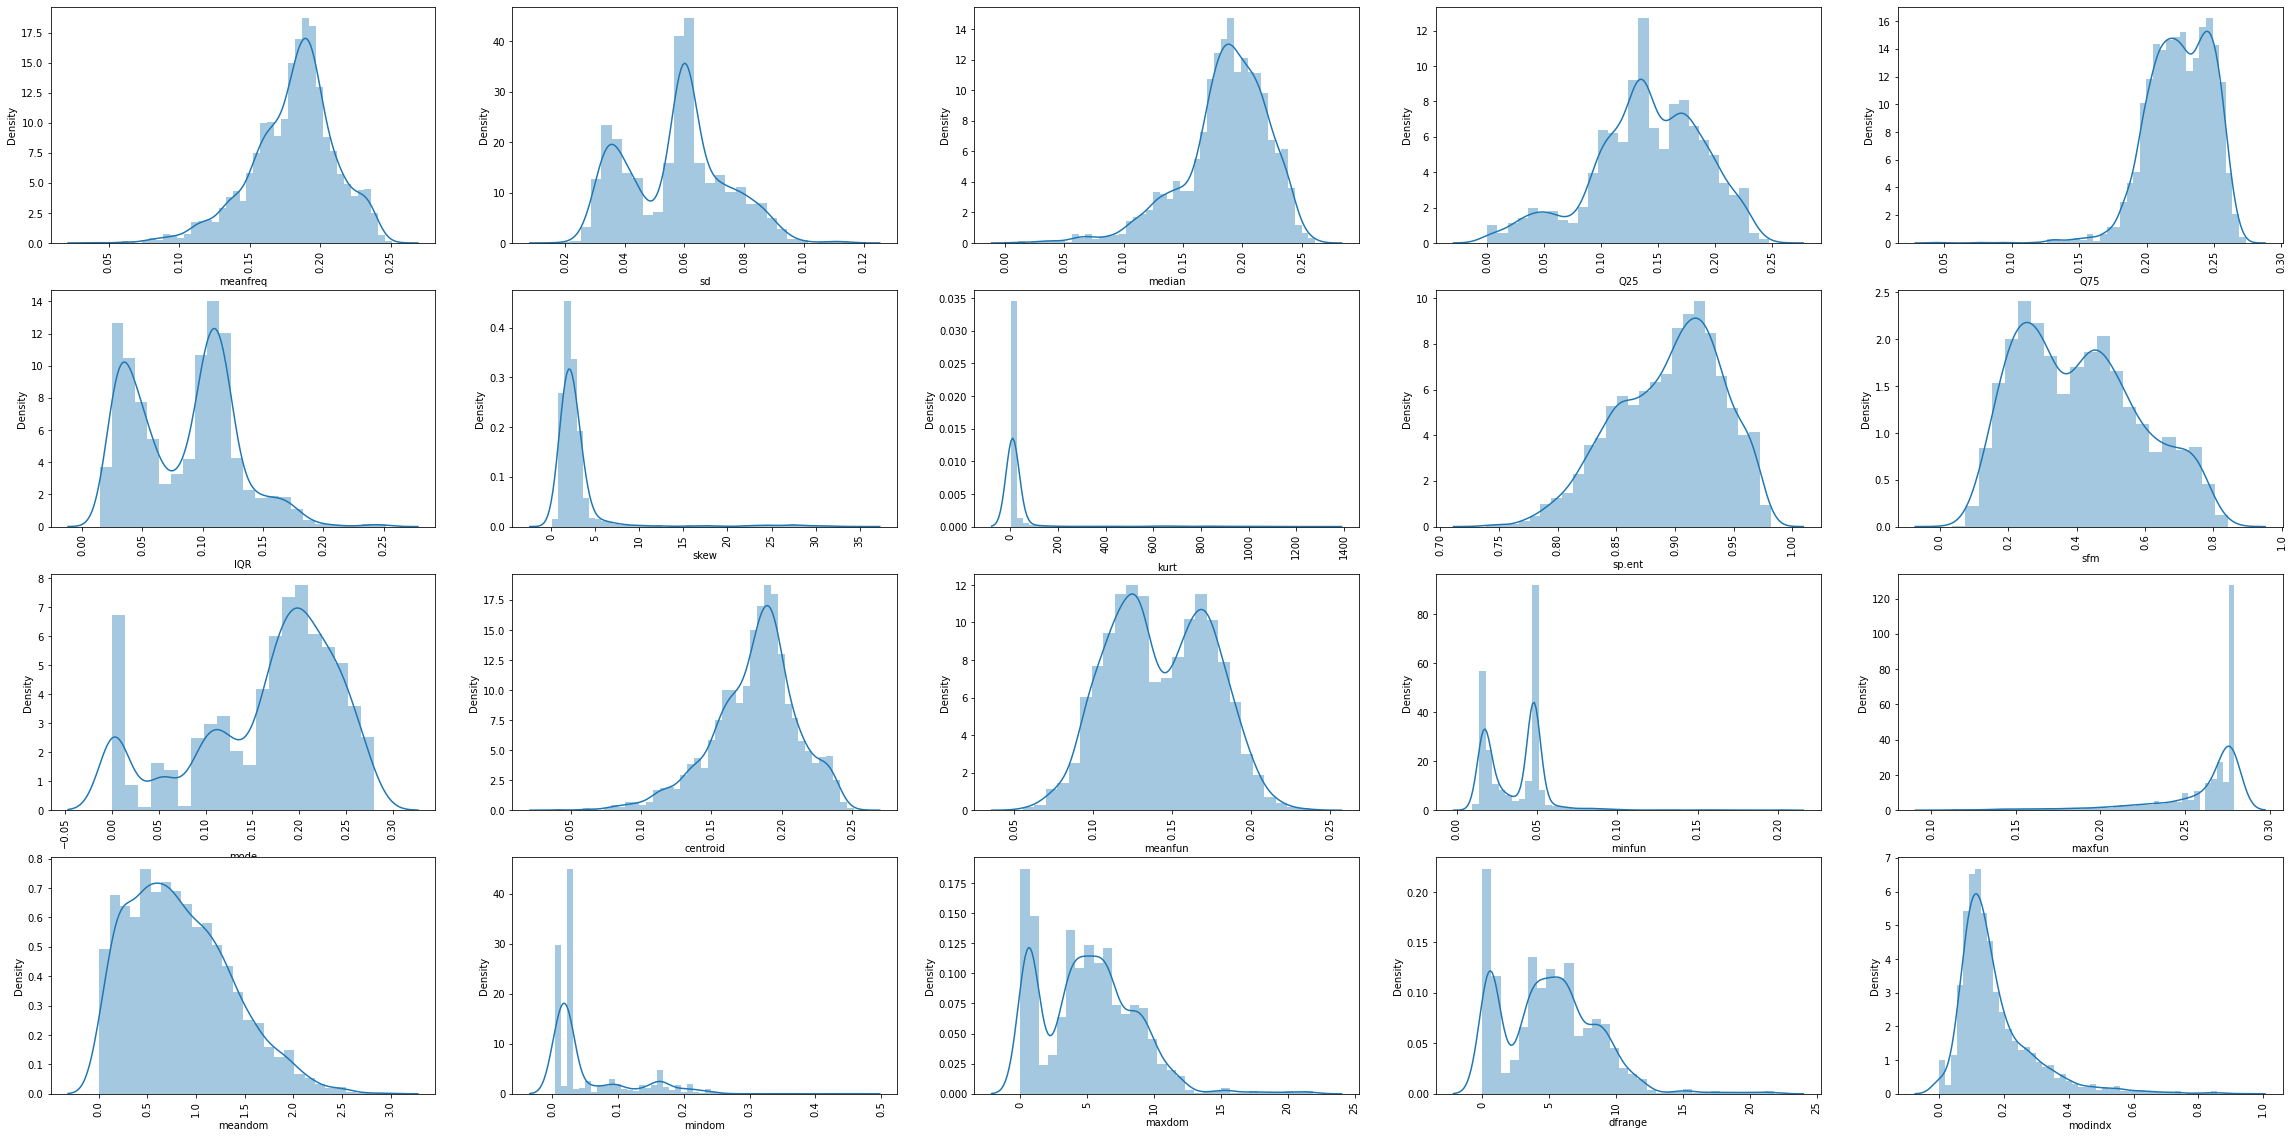

In [ ]:
fig, ax = plt.subplots(4, 5, figsize=(40,20))
numerical = ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun','meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']
for variable, subplot in zip(numerical, ax.flatten()):
    sns.distplot(train[variable],ax=subplot)
    for label in subplot.get_xticklabels():
      label.set_rotation(90)

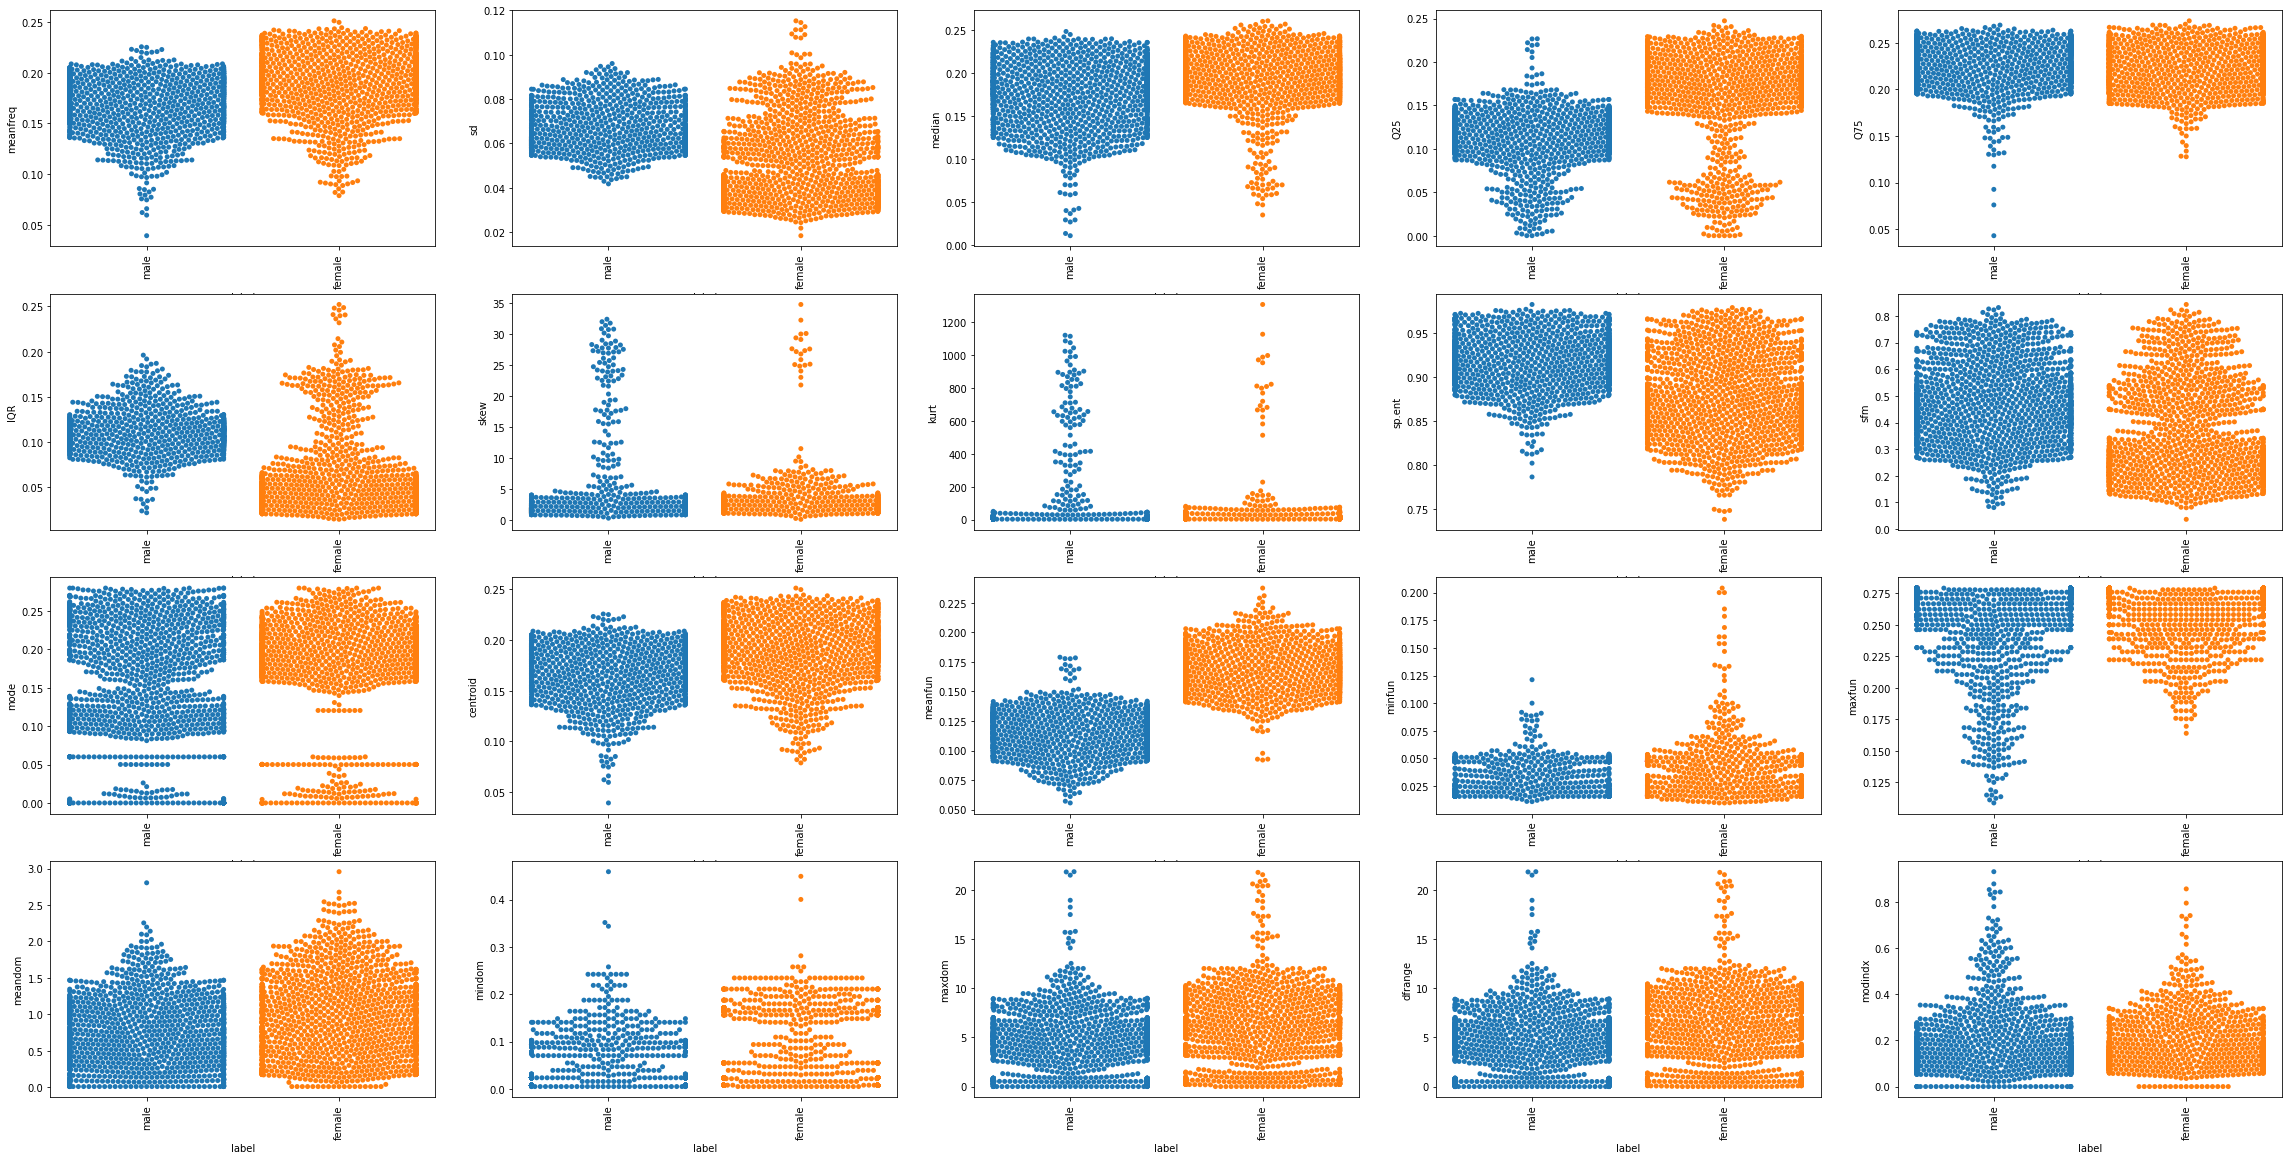

In [ ]:
fig, ax = plt.subplots(4, 5, figsize=(40,20))
numerical = ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun','meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']
for variable, subplot in zip(numerical, ax.flatten()):
    g= sns.swarmplot(x = train['label'], y = train[variable],data = train, ax=subplot)
    for label in subplot.get_xticklabels():
      label.set_rotation(90)

interval columns not set, guessing: ['Id', 'meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']


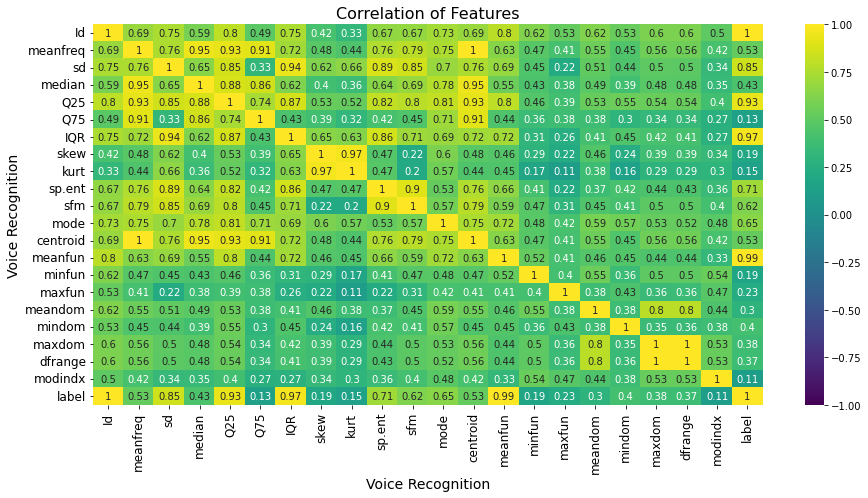

In [ ]:
# Preliminary check on co-relation between the variables
phi_k_corr = train.phik_matrix()
phi_k_corr

# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15, 7])

# Using magic of seaborn's heatmap() function
sns.heatmap(data=phi_k_corr, annot=True, cmap='viridis',vmin=-1, vmax=1, center=0)

# Changing x-ticks label size to 12
plt.xticks(size=12, rotation=90)

# Changing y-ticks label size to 12
plt.yticks(size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Voice Recognition', size=14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel='Voice Recognition', size=14)

# Labelling title with a custom label and size of 14
plt.title(label='Correlation of Features', size=16)


# Dispaly the output by rendering visual on the screen
plt.show()

In [ ]:
train.duplicated().value_counts()

False    2851
dtype: int64

In [ ]:
train_ID = train['Id']

In [ ]:
X = train.drop(['label','Id'],axis = 1)
y = train['label']

In [ ]:
X.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.16234,0.05821,0.17406,0.10023,0.19651,0.09629,2.12723,7.81513,0.92153,0.42687,0.19513,0.16234,0.09585,0.01675,0.23529,0.40603,0.04688,3.48438,3.43750,0.15535
1,0.16165,0.05743,0.17014,0.15752,0.18293,0.02541,6.96885,60.96805,0.87041,0.45988,0.17101,0.16165,0.16349,0.01560,0.20408,0.59516,0.17090,3.97949,3.80859,0.20907
2,0.16529,0.06189,0.13507,0.11847,0.22518,0.10671,2.63186,12.62912,0.91890,0.41362,0.12919,0.16529,0.12005,0.03509,0.22222,0.45858,0.08789,1.01562,0.92773,0.45983
3,0.18810,0.05574,0.20603,0.13049,0.22947,0.09898,1.53841,5.14575,0.91433,0.39867,0.22270,0.18810,0.10847,0.02130,0.14545,0.49323,0.12500,4.73438,4.60938,0.10520
4,0.18750,0.04423,0.19007,0.15680,0.21544,0.05864,1.65308,5.83947,0.90748,0.33792,0.19600,0.18750,0.15453,0.04834,0.27907,1.11350,0.02344,8.76562,8.74219,0.10310


In [ ]:
num_X = X.select_dtypes(exclude=['object'])
num_data.columns

Index(['Id', 'meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')

In [ ]:
num_x_scale = ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']

In [ ]:
from sklearn.model_selection import train_test_split                # To properly split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler                    # Importing to scale the features in the dataset
scalar = StandardScaler()
X_train[num_x_scale] = scalar.fit_transform(X_train[num_x_scale])
X_train.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,2280.00000,2280.00000,2280.00000,2280.00000,2280.00000,2280.00000,2280.00000,2280.00000,2280.00000,2280.00000,2280.00000,2280.00000,2280.00000,2280.00000,2280.00000,2280.00000,2280.00000,2280.00000,2280.00000,2280.00000
mean,-0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000
std,1.00022,1.00022,1.00022,1.00022,1.00022,1.00022,1.00022,1.00022,1.00022,1.00022,1.00022,1.00022,1.00022,1.00022,1.00022,1.00022,1.00022,1.00022,1.00022,1.00022
min,-4.12628,-2.34390,-4.91086,-2.89956,-6.44245,-1.63662,-0.68341,-0.25744,-3.48720,-2.11400,-2.15324,-4.12628,-2.66093,-1.39602,-5.08364,-1.54584,-0.74665,-1.41363,-1.40183,-1.47244
25%,-0.57994,-0.89713,-0.44823,-0.59504,-0.67723,-0.97820,-0.35700,-0.23206,-0.73293,-0.84362,-0.60955,-0.57994,-0.77512,-0.96406,-0.17674,-0.79049,-0.69967,-0.91248,-0.90983,-0.63122
50%,0.12362,0.11737,0.11058,-0.00932,0.05184,0.22414,-0.22522,-0.21219,0.15789,-0.05448,0.27813,0.12362,-0.10443,0.51265,0.40484,-0.13418,-0.44912,-0.02397,-0.02269,-0.29583
75%,0.60806,0.58510,0.69434,0.72834,0.80137,0.69648,-0.04581,-0.17040,0.75151,0.71224,0.72681,0.60806,0.83483,0.57403,0.61663,0.66940,0.21249,0.59482,0.60284,0.31331
max,2.32211,3.49539,2.08065,2.06281,1.93331,3.92862,7.57993,9.67166,1.92790,2.46737,1.47829,2.32211,2.93587,8.64343,0.67261,3.98094,6.53503,4.70964,4.71891,5.94351


In [ ]:
X_test[num_x_scale]=scalar.transform(X_test[num_x_scale])
X_test.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,571.00000,571.00000,571.00000,571.00000,571.00000,571.00000,571.00000,571.00000,571.00000,571.00000,571.00000,571.00000,571.00000,571.00000,571.00000,571.00000,571.00000,571.00000,571.00000,571.00000
mean,-0.05025,-0.03603,-0.07678,-0.03065,-0.07908,-0.00811,-0.01785,-0.01358,-0.00536,-0.00982,-0.03495,-0.05025,-0.00218,0.01035,-0.03934,0.00670,0.09513,0.02998,0.02833,-0.02916
std,1.05433,0.99697,1.06321,1.02017,1.07301,1.00253,0.99491,0.99090,0.98394,1.02633,0.98747,1.05433,0.98819,0.95469,1.03277,0.92085,1.04529,0.93683,0.93696,1.03572
min,-4.81466,-1.98805,-4.83766,-2.78905,-7.86845,-1.61476,-0.71779,-0.25897,-2.72859,-1.85380,-2.15324,-4.81466,-2.70679,-1.38952,-4.87263,-1.54584,-0.74665,-1.41363,-1.40183,-1.47244
25%,-0.65202,-0.99220,-0.54881,-0.63164,-0.80677,-0.98065,-0.36366,-0.23243,-0.76166,-0.86421,-0.65278,-0.65202,-0.81479,-0.94427,-0.31078,-0.67748,-0.69967,-0.56561,-0.55902,-0.63572
50%,0.11366,0.10827,0.06673,-0.00019,-0.05953,0.26519,-0.23276,-0.21054,0.07545,-0.10309,0.21907,0.11366,0.03864,0.52322,0.40484,-0.09043,-0.44912,0.02856,0.02328,-0.31724
75%,0.59701,0.54702,0.63350,0.70598,0.80764,0.70053,-0.05638,-0.17428,0.72328,0.70072,0.68865,0.59701,0.79976,0.57774,0.61663,0.59027,0.67837,0.55050,0.55961,0.20460
max,2.37259,2.58948,2.09981,2.20334,2.08959,2.83901,6.97469,8.29640,1.80237,2.32596,1.47829,2.37259,2.30427,7.32537,0.67261,2.65139,3.30917,4.70308,4.71234,6.38932


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_train[num_x_scale] = pca.fit_transform(X_train[num_x_scale])
X_test[num_x_scale] = pca.transform(X_test[num_x_scale])

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([4.52323782e-01, 1.17074421e-01, 1.08539301e-01, 7.56648992e-02,
       5.36210934e-02, 4.52177282e-02, 3.27116362e-02, 2.94453830e-02,
       2.48553464e-02, 1.89422741e-02, 1.71802959e-02, 9.04942511e-03,
       7.25484956e-03, 4.75897469e-03, 2.30197939e-03, 6.38667354e-04,
       4.19943311e-04, 1.97475413e-20, 1.28312643e-23, 7.22877390e-33])

In [ ]:
components = len(explained_variance)
components

20

In [ ]:
np.sum(explained_variance)

0.9999999999999998

In [ ]:
np.sum(explained_variance[:2])

0.5693982033115786

In [ ]:
np.sum(explained_variance[:3])

0.6779375041501884

In [ ]:
np.sum(explained_variance[:4])

0.7536024033992701

In [ ]:
##Cumulative variance and components
var = np.cumsum(np.round(explained_variance, decimals=3) * 100)
var

array([ 45.2,  56.9,  67.8,  75.4,  80.8,  85.3,  88.6,  91.5,  94. ,
        95.9,  97.6,  98.5,  99.2,  99.7,  99.9, 100. , 100. , 100. ,
       100. , 100. ])

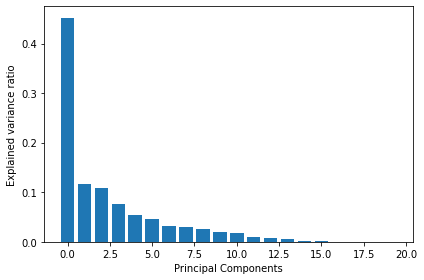

In [ ]:
plt.bar(range(components), explained_variance, align='center', label='Individual Explained Variance') 
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal Components")
plt.tight_layout()

**Variance does not increase significantly after 15 components**

**The first 10 components attribute for 96% of variance**

**Hence we will consider first 10 PCA components only**

In [ ]:
pca2 = PCA(n_components=10, random_state=0)

X_train2 = pca2.fit_transform(X_train[num_x_scale])
X_test2 = pca2.transform(X_test[num_x_scale])

# Printing shape of X_train and X_test
print('Shape of X_train: ', X_train2.shape)
print('Shape of X_test: ', X_test2.shape)

Shape of X_train:  (2280, 10)
Shape of X_test:  (571, 10)


In [ ]:
explained_variance = pca2.explained_variance_ratio_
explained_variance

array([0.45232378, 0.11707442, 0.1085393 , 0.0756649 , 0.05362109,
       0.04521773, 0.03271164, 0.02944538, 0.02485535, 0.01894227])

In [ ]:
var = np.cumsum(np.round(explained_variance, decimals=3) * 100)
var

array([45.2, 56.9, 67.8, 75.4, 80.8, 85.3, 88.6, 91.5, 94. , 95.9])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, n_jobs=-1)
rf.fit(X_train2, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [ ]:
y_pred_train = rf.predict(X_train2)
y_pred_train.shape

(2280,)

In [ ]:
y_pred_test = rf.predict(X_test2)
y_pred_test.shape

(571,)

In [ ]:
from sklearn.metrics import classification_report
c_report_train = classification_report(y_train,y_pred_train)
c_report_test = classification_report(y_test,y_pred_test)
print (c_report_train,c_report_test)

              precision    recall  f1-score   support

      female       1.00      1.00      1.00      1140
        male       1.00      1.00      1.00      1140

    accuracy                           1.00      2280
   macro avg       1.00      1.00      1.00      2280
weighted avg       1.00      1.00      1.00      2280
               precision    recall  f1-score   support

      female       0.98      0.98      0.98       292
        male       0.98      0.97      0.98       279

    accuracy                           0.98       571
   macro avg       0.98      0.98      0.98       571
weighted avg       0.98      0.98      0.98       571



In [ ]:
test = pd.read_csv('voice_test.csv',skipinitialspace=True)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        317 non-null    int64  
 1   meanfreq  317 non-null    float64
 2   sd        317 non-null    float64
 3   median    317 non-null    float64
 4   Q25       317 non-null    float64
 5   Q75       317 non-null    float64
 6   IQR       317 non-null    float64
 7   skew      317 non-null    float64
 8   kurt      317 non-null    float64
 9   sp.ent    317 non-null    float64
 10  sfm       317 non-null    float64
 11  mode      317 non-null    float64
 12  centroid  317 non-null    float64
 13  meanfun   317 non-null    float64
 14  minfun    317 non-null    float64
 15  maxfun    317 non-null    float64
 16  meandom   317 non-null    float64
 17  mindom    317 non-null    float64
 18  maxdom    317 non-null    float64
 19  dfrange   317 non-null    float64
 20  modindx   317 non-null    float6

In [ ]:
test.describe()

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,317.00000,317.00000,317.00000,317.00000,317.00000,317.00000,317.00000,317.00000,317.00000,317.00000,317.00000,317.00000,317.00000,317.00000,317.00000,317.00000,317.00000,317.00000,317.00000,317.00000,317.00000
mean,1510.96215,0.18076,0.05697,0.18471,0.14142,0.22508,0.08366,3.33531,43.40485,0.89347,0.40591,0.16349,0.18076,0.14205,0.03651,0.25771,0.78967,0.05277,4.79124,4.73848,0.17211
std,954.56922,0.03104,0.01725,0.03803,0.04921,0.02482,0.04334,4.88036,163.13770,0.04665,0.18345,0.07983,0.03104,0.03335,0.01958,0.03244,0.52111,0.06619,3.47046,3.46832,0.11955
min,0.00000,0.04825,0.02400,0.01579,0.00027,0.05827,0.01743,0.74662,2.62722,0.74769,0.08493,0.00000,0.04825,0.07469,0.00991,0.10309,0.00781,0.00488,0.00781,0.00000,0.00000
25%,605.00000,0.16300,0.04066,0.16835,0.11061,0.20847,0.04081,1.72298,6.02247,0.85761,0.25142,0.11589,0.16300,0.11362,0.01822,0.25000,0.38907,0.00781,1.23047,1.18750,0.10376
50%,1506.00000,0.18480,0.05916,0.18941,0.14073,0.22510,0.09543,2.26426,8.67465,0.90133,0.39198,0.18590,0.18480,0.13935,0.04290,0.27119,0.74400,0.02344,4.92188,4.87500,0.14427
75%,2310.00000,0.20015,0.06887,0.21010,0.18061,0.24298,0.11314,2.91188,13.55971,0.92798,0.53469,0.22035,0.20015,0.16920,0.04785,0.27746,1.12855,0.07031,6.74219,6.63281,0.20225
max,3158.00000,0.24704,0.11026,0.25663,0.23858,0.26853,0.24530,34.53749,1271.35363,0.97291,0.78688,0.27807,0.24704,0.21674,0.15842,0.27911,2.51544,0.25781,20.48438,20.46094,0.72850


In [ ]:
cat_data_test = test.select_dtypes(include=['object'])
cat_data_test.columns

Index([], dtype='object')

In [59]:
num_data_test = test.select_dtypes(exclude=['object'])
num_data_test.columns

Index(['Id', 'meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx'],
      dtype='object')

In [60]:
test.duplicated().value_counts()

False    317
dtype: int64

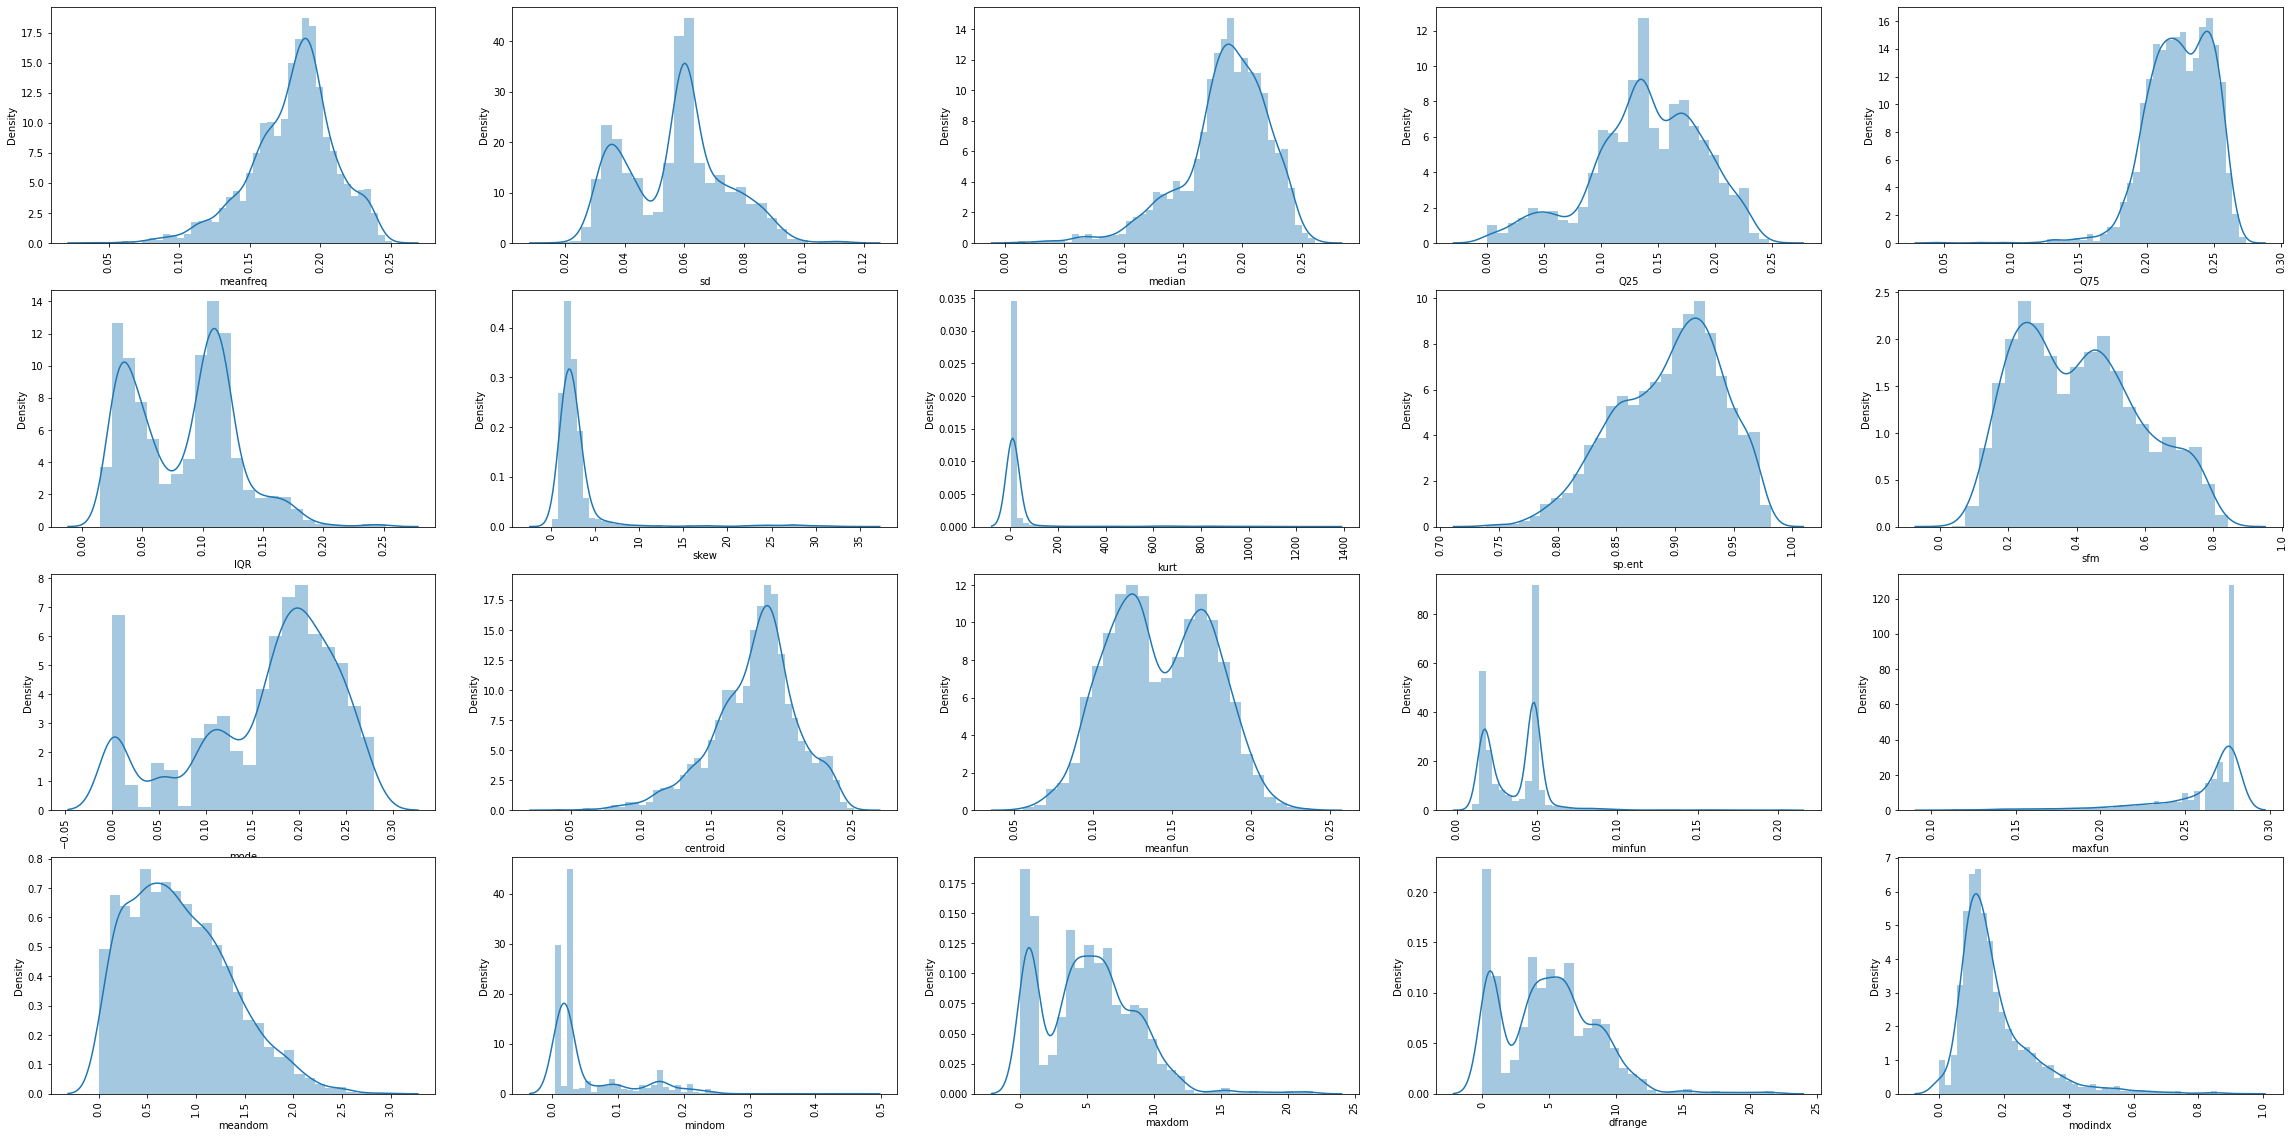

In [61]:
fig, ax = plt.subplots(4, 5, figsize=(40,20))
numerical = ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun','meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']
for variable, subplot in zip(numerical, ax.flatten()):
    sns.distplot(train[variable],ax=subplot)
    for label in subplot.get_xticklabels():
      label.set_rotation(90)

In [62]:
test_ID = test['Id']

In [63]:
X_validate = test.drop(['Id'],axis = 1)

In [64]:
num_x_scale = ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']

In [65]:
X_validate[num_x_scale] = scalar.transform(X_validate[num_x_scale])
X_validate.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,317.00000,317.00000,317.00000,317.00000,317.00000,317.00000,317.00000,317.00000,317.00000,317.00000,317.00000,317.00000,317.00000,317.00000,317.00000,317.00000,317.00000,317.00000,317.00000,317.00000
mean,-0.01560,-0.01762,-0.04367,0.01596,-0.00071,-0.01848,0.04845,0.05497,-0.04212,-0.01655,-0.03277,-0.01560,-0.02652,-0.01471,-0.05019,-0.08098,0.02116,-0.07369,-0.07408,-0.02117
std,1.05343,1.03918,1.06551,1.01623,1.07216,1.01489,1.17095,1.23901,1.03798,1.04269,1.03531,1.05343,1.03356,1.01187,1.09585,0.97634,1.06139,0.97215,0.97184,1.00804
min,-4.51291,-2.00415,-4.77595,-2.89877,-7.20657,-1.56939,-0.57266,-0.25473,-3.28594,-1.84085,-2.15324,-4.51291,-2.11403,-1.38902,-5.27289,-1.54584,-0.74665,-1.41363,-1.40183,-1.47244
25%,-0.61832,-1.00022,-0.50207,-0.62015,-0.71808,-1.02194,-0.33840,-0.22894,-0.83996,-0.89463,-0.65013,-0.61832,-0.90771,-0.95953,-0.31078,-0.83153,-0.69967,-1.07114,-1.06909,-0.59751
50%,0.12152,0.11426,0.08800,0.00169,0.00006,0.25706,-0.20853,-0.20880,0.13280,-0.09570,0.25789,0.12152,-0.11008,0.31524,0.40484,-0.16654,-0.44912,-0.03710,-0.03583,-0.25595
75%,0.64264,0.69958,0.66747,0.82532,0.77231,0.67186,-0.05314,-0.17170,0.72578,0.71540,0.70464,0.64264,0.81500,0.57107,0.61663,0.55394,0.30254,0.47281,0.45672,0.23296
max,2.23400,3.19337,1.97113,2.02236,1.87614,3.76646,7.53484,9.38109,1.72575,2.14878,1.45328,2.23400,2.28823,6.28397,0.67261,3.15238,3.30917,4.32229,4.33144,4.67023


In [66]:
X_validate2 = pca2.transform(X_validate[num_x_scale])

In [67]:
y_pred_validate = rf.predict(X_validate2)
y_pred_validate.shape

(317,)

In [72]:
test['label']=y_pred_validate
test['Id']=test_ID
test.head()

,Id,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,2148,0.18683,0.02747,0.18432,0.17395,0.20473,0.03078,2.65522,10.56585,0.82181,0.15988,0.18065,0.18683,0.17279,0.02349,0.27119,0.17857,0.00781,0.22656,0.21875,0.10893,male
1,1124,0.18888,0.06032,0.19554,0.13807,0.24298,0.10490,1.49739,5.03709,0.90942,0.37422,0.14039,0.18888,0.13309,0.05085,0.27273,0.85594,0.02344,8.71875,8.69531,0.09871,male
2,170,0.15070,0.08713,0.17430,0.06967,0.22608,0.15642,2.60395,22.32890,0.96929,0.78173,0.05018,0.15070,0.10999,0.01726,0.26667,1.24095,0.00781,5.56250,5.55469,0.33240,male
3,3158,0.18367,0.04061,0.18253,0.15648,0.20765,0.05117,2.05414,7.48302,0.89814,0.31392,0.17704,0.18367,0.14924,0.01865,0.26230,0.55031,0.00781,3.42188,3.41406,0.16650,male
4,2229,0.20516,0.03954,0.21080,0.18667,0.22891,0.04224,2.09968,7.56221,0.87600,0.27188,0.22489,0.20516,0.15474,0.04711,0.27746,1.57884,0.18750,10.80469,10.61719,0.11364,female


In [73]:
test.label.value_counts()

male      200
female    117
Name: label, dtype: int64

In [75]:
final_pred = test[['Id','label']]
final_pred.head()

,Id,label
0,2148,male
1,1124,male
2,170,male
3,3158,male
4,2229,female


In [76]:
final_pred.label.replace({'male':1, 'female':0}, inplace = True)
final_pred.head()
final_pred.label.value_counts()

1    200
0    117
Name: label, dtype: int64

In [77]:
final_pred.to_csv('submission.csv', header=False, index=False)